In [57]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Download stock data using yfinance
data = yf.download('GOOG', start='2020-01-01', end='2024-01-31')

# Split data into training and testing sets
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.transform(data_test)

# Create a function to prepare the data for the random forest model
def prepare_data(data):
    x = []
    y = []
    for i in range(100, data.shape[0]):
        x.append(data[i-100:i, 0].reshape(1, -1))
        y.append(data[i,0])
    x, y = np.vstack(x), np.array(y)
    return x, y

# Prepare data for training and testing
x_train, y_train = prepare_data(data_train_scale)
x_test, y_test = prepare_data(data_test_scale)

# Create a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = scaler.inverse_transform(model.predict(x_test).reshape(-1, 1))


[*********************100%%**********************]  1 of 1 completed


Accuracy of Random Forest Model: 100.0 %


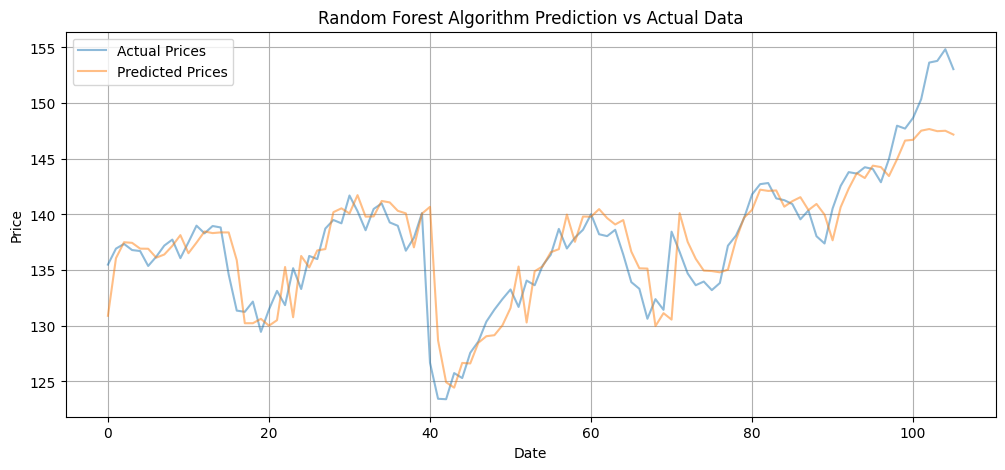

In [58]:
future_predictions = []
for i in range(len(x_test)):
    future_predictions.append(model.predict(x_test[i].reshape(1, 100)))

future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predicted and actual values to get original scales
predictions = scaler.inverse_transform(future_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate accuracy
predictions_rf = model.predict(x_test)
num_correct_rf = 0
for i in range(len(predictions_rf)):
    if abs(predictions_rf[i] - y_test[i]) < 1:
        num_correct_rf += 1

acc_rf = (num_correct_rf / len(predictions_rf)) * 100
print('Accuracy of Random Forest Model:', acc_rf, '%')


# Plot the comparison graph
plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual Prices', alpha=0.5)
plt.plot(predictions, label='Predicted Prices', alpha=0.5)
plt.legend(loc='upper left')
plt.title('Random Forest Algorithm Prediction vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

